# Introduction to Machine Learning with Python

* Weak AI: <font color=gray>*Automation*</font>
    * Symbolic AI: <font color=gray>*Programming*</font>
    * **Machine Learning**: <font color=gray>*Statistical Programs*</font>
        * Supervised Learning: <font color=gray>*History: (Observables X, Unobservables Y)*</font>
            * **Regression**: <font color=gray>*Y is a Quantity*</font>
                * Linear Regression: <font color=gray>*y = f(x) is a straight line*</font>
                * ...
            * **Classification**: <font color=gray>*Y is a Category*</font>
                * Decision Tree: <font color=gray>*y = f(x) is a series of splits*</font>
        * Unsupervised: <font color=gray>*History: (Observables X, ...)*</font>
            * **Clustering**: <font color=gray>*X -> {GroupA, GroupB, ...}*</font>
                * k-Means 
            * Compression: <font color=gray>*Big X -> Small X st. keep information*</font>
                * PCA
            * Descriptive Statistics: <font color=gray>*Summarising Data*</font>
                * eg., Mean
* Strong AI: <font color=gray>*Open Exploration*</font>
    * imagation, curiosity, acting within environment, acting upon environment, 
    * internal motivation system ("emotion", obligation, ...),
    * body (motor system, ...)

## How does machine learning solve (narrow, statistical) problems?

* Step 0. Get Data: Import -> Select -> Prepare Data
* Step 1. Learning: Data -> Algorithm -> Model
* Step 2. Inference: NewData -> Model -> Prediction 

---
* Step 0. $D_{datasets} \rightarrow (cols, \dots) \rightarrow (X, y)$
* Step 1. $(X, y) \rightarrow \mathcal{A} \rightarrow f(x)$
* Step 2. $ f(x_{new}) \rightarrow y_{new}$

--- 

* Step 0. `df = pd.read_csv(); X = df[cols];  y = df[col]`
* Step 1. `model = algorithm.fit(X, y)`
* Step 2. `y_new = model.predict([ x1_new, x2_new ...])`

## What are the key problems machine learning can solve?

* Regression
    * predict an unobservable quantity from observables (using history of both)
* Classification  
    * predict an unobservable category from observables (using history of both)
* Clustering
    * split a dataset into groups of similar points (using only observable data)
    * ie., group stuff / split into groups / "cluster"}

## How do I solve these problems in python?

The relevant library in python is "Sci-Kit Learn", which is imported,

In [1]:
import sklearn

But sklearn is more like a library of libraries, so we typically import something more specific,

In [ ]:
from sklearn import 

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn.cluster import KMeans

In [ ]:
import seaborn as sns

Above we have imported three *algorithms* which can analyse datasets and produce *models*. 

In [ ]:
LinearRegression()

In [ ]:
str()

## How do I use `sklearn` algorithms to obtain inferential models?

In [3]:
import pandas as pd

ti = pd.read_csv('datasets/titanic.csv').drop(columns=['deck']).dropna()

In [ ]:
ti.sample(3)

#### Step 1: Find the model

`sklearn` requires X to be 2-dimensional and y to be 1-dimensional (not always true for y)

In [ ]:
ti[['fare']].values

In [ ]:
X = ti[['fare']]
y = ti['age']

f_model = LinearRegression().fit(X, y) # this is machine learning

#### Step 2: Infer

In [ ]:
f_model.predict([
    [500],
    [20],
    [10],
    [5]
])

If you dont know anything, predicting the mean is a pretty good prediction...

In [ ]:
age_mean = ti['age'].mean()
age_mean

In [ ]:
f_model.score(X, y)

The algorithm above has produced a model which basically just predicts the mean. The mean is a *learnt* metric (ie., some learning has taken place) -- but it is perhaps the most simple possible.

That our model basically predicts the mean shows it's learnt really very little about *individual people*, and therfore has learnt not much in general. 

When evaluating the quality of our models, we should compare them to "good *naive* solutions" (such as the mean) rather than just random stuff. It's very easy to believe you've done extremely well if you just compare to a random guess.

In [4]:
import matplotlib.pyplot as plt

In [ ]:
fig = plt.figure(figsize=(15, 8))
sns.scatterplot(x=ti['fare'], y=ti['age'])
sns.lineplot(color="red", x=[0, 100, 300, 500], y=f_model.predict([[0], [100], [300], [500]]));
sns.lineplot(color="green", x=[0, 100, 300, 500], y=[age_mean, age_mean, age_mean, age_mean]);

### Example: Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression

Ask the algorithm to `fit`, or "Learn",

In [ ]:
#clf_model = DecisionTreeClassifictaion().fit(ti[['age', 'fare']], ti['survived'])
clf_model = LogisticRegression().fit(ti[['age', 'fare']], ti['survived'])

Ask the model to predict,

In [ ]:
clf_model.predict([
    [8, 2],
    [8, 20],
    [30, 50],
    [13, 50],
    [80, 5],
])

#### Aside: visualizing the model's predictions

In [ ]:
ages = fares = 

In [ ]:
points = {'x':[], 'y':[]}
for i in range(0, 500):
    for j in range(0, 100):
        points['y'].append(i)
        points['x'].append(j)

In [ ]:
plt.style.use('seaborn-dark')
fig = plt.figure(figsize=(15, 8))
sns.scatterplot(x=ti['age'], y=ti['fare'], hue=ti['survived']);
sns.scatterplot(x=points['x'], y=points['y'], hue=clf_model.predict(list(zip(points['x'], points['y']))))

### Aside: Example: Clustering

With k-Means clustering, we also the algorithm to try to find various numbers of groups. Below, eg., we ask it to split the data into 1 to 21 groups.

In [64]:
ti

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [65]:
model = KMeans(n_clusters=2).fit(ti[['age', 'fare']])
print(model.cluster_centers_)

[[ 29.49889381  25.2546087 ]
 [ 32.49764706 220.27230294]]


In [66]:
scores = []
groups = [] 

for k in range(1, 21):
    groups.append(k)
    scores.append(KMeans(k).fit(ti[['age', 'fare']]).inertia_)

C:\Users\Thomas Holmes\.conda\envs\ppds\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [67]:
scores

[2141919.9035541806,
 910289.9385167852,
 508137.01798266626,
 313941.56684017606,
 233683.04779270783,
 162913.28143612487,
 125177.38300588433,
 109856.4754211695,
 94934.99472089038,
 83762.28602974943,
 75178.1713885642,
 66200.49865974225,
 61939.625324836314,
 54017.32067156787,
 48701.08806704659,
 46357.98349489752,
 42339.634369727864,
 39727.26702177689,
 37012.40942597999,
 33879.61862238334]

We track the "inertia", or, how well the split has happened.

In [68]:
import seaborn as sns

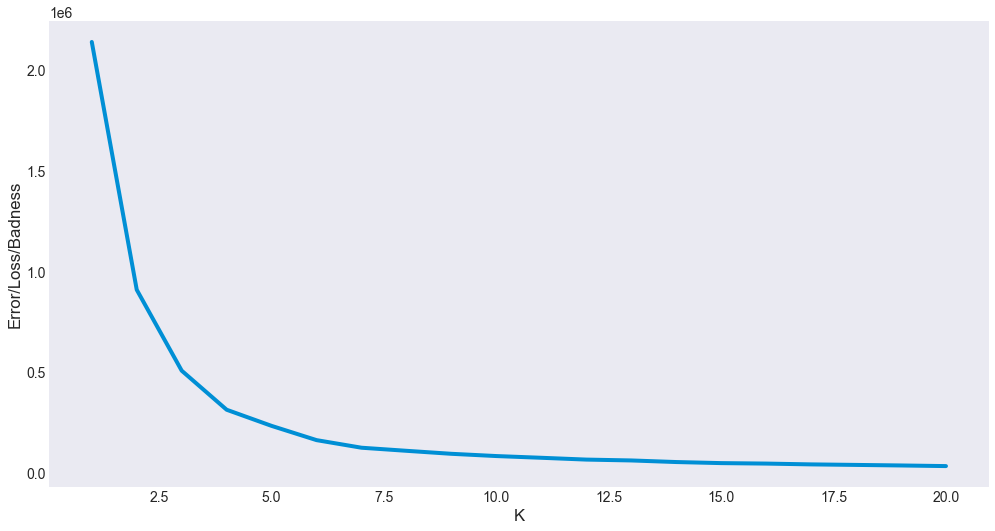

In [71]:
plt.figure(figsize=(15, 8))
sns.lineplot(x=groups, y=scores, )
plt.xlabel('K')
plt.ylabel('Error/Loss/Badness');

You can always keep splitting data, so we *guess* that there's probably c. 3 groups -- based on there being dimishing returns after that point,

In [5]:
model = KMeans(3).fit(ti[['age', 'fare']])

To plot the solution, we can plot where it thinks the centres of the groups are,

In [6]:
centres = model.cluster_centers_
centres

array([[ 28.35807292,  16.32360312],
       [ 31.16666667, 285.38148333],
       [ 35.67728814,  85.36119407]])

In [7]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=ti['age'], y=ti['fare'])
sns.scatterplot(x=centres[:, 0], y=centres[:, 1])

NameError: name 'sns' is not defined

<Figure size 1080x576 with 0 Axes>

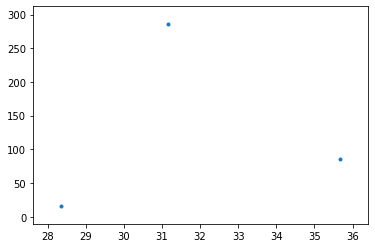

In [9]:
import scipy
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(centres)
fig = voronoi_plot_2d(vor, show_vertices=True)
plt.show()

## Exercise (30 min)

Choose a problem domain (eg., retail, finance, banking,... health, foods, preferences). Provide the algorithms with suitable datasets, and observe and characterise the quality and nature of their predictions. 

### Part 1: Regression

Modify the `X` dataset and `y` to represent relevant aspects of your problem: choose what can be observed, and what can be predicted. 

Introduce at least 10 points total, if possible, more.

In [ ]:
# annie_hall, transformers, america_beauty

X = [
    [10, 3, 7], # eg., Alice
    [9, 0, 9],
    [3, 6, 8],
    [3, 3, 2],
    [1, 9, 1]
]

# how much the above customers spent on our new film (prescreening)

y = [
    20, 
    15, 
    7, 
    7, 
    5
]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression().fit(X, y)

In [ ]:
X_new = [ 
    # we dont know what these people will spend
    [1, 3, 7],
    [6, 10, 10],
    [1, 6, 8],
    [3, 3, 2],
    [1, 9, 1]
]

predictions = model.predict(X_new)

In [ ]:
predictions

In [ ]:
for user, prediction in zip(X_new, predictions):
    print(user, ' = ', prediction)

### Part 2: Classification (Stretch)

0. Revise this notebook and understand what classifiction means
    * y is a label
1. Above, repeat all the code in a single cell
2. Change `LinearRegression` to `DecisionTreeClassifier`
    * HINT: `from sklearn.tree import DecisionTreeClassifier`
3. Your `y` should now be *categories*
    * HINT: try using text labels (eg., HOT, COLD) in `y`
    * HINT: just use `1`, `0`